<a href="https://colab.research.google.com/github/cauarichard/crud2/blob/main/capsule_rodando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bloco 1: montar Drive e ir para /content
from google.colab import drive
drive.mount('/content/drive')

import os, shutil

# Garantir que estamos em /content
os.chdir('/content')
print("Diretório atual:", os.getcwd())

# Apagar versão antiga do repositório, se existir
if os.path.exists('Capsule-Forensics'):
    shutil.rmtree('Capsule-Forensics')
    print("Removido /content/Capsule-Forensics")


Mounted at /content/drive
Diretório atual: /content


In [2]:
# Bloco 2: clonar repositório oficial
!git clone https://github.com/nii-yamagishilab/Capsule-Forensics.git

import os
os.chdir('/content/Capsule-Forensics')
print("Diretório atual:", os.getcwd())

print("Conteúdo da pasta raiz:")
print(os.listdir('.'))

print("\nConteúdo de checkpoints:")
print(os.listdir('checkpoints'))


Cloning into 'Capsule-Forensics'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 147 (delta 0), reused 2 (delta 0), pack-reused 144 (from 1)
Receiving objects: 100% (147/147), 118.26 MiB | 18.79 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Diretório atual: /content/Capsule-Forensics
Conteúdo da pasta raiz:
['.gitignore', 'LICENSE', 'demo', 'README.md', 'test_by_patches.py', 'dataset', 'test.py', 'index.html', '.git', 'train.py', 'test_vid_lvl.py', 'checkpoints', 'model.py']

Conteúdo de checkpoints:
['cgvsphoto', 'replay-attack', 'deepfakes', 'face2face']


In [3]:
# Bloco 3: copiar dataset do Drive para o projeto

import os, shutil

# Caminhos no Drive (AJUSTAR se estiver diferente)
drive_fake = '/content/drive/MyDrive/dataset/test/fake'
drive_real = '/content/drive/MyDrive/dataset/test/real'

print("Conteúdo no Drive - fake:", os.listdir(drive_fake))
print("Conteúdo no Drive - real:", os.listdir(drive_real))

# Destino dentro do projeto (usando padrão do README: Real / Fake)[web:7]
proj_fake = '/content/Capsule-Forensics/dataset/test/Fake'
proj_real = '/content/Capsule-Forensics/dataset/test/Real'

os.makedirs(proj_fake, exist_ok=True)
os.makedirs(proj_real, exist_ok=True)

# Limpar pastas de destino (para não acumular arquivos velhos)
for f in os.listdir(proj_fake):
    os.remove(os.path.join(proj_fake, f))
for f in os.listdir(proj_real):
    os.remove(os.path.join(proj_real, f))

# Copiar arquivos
def copy_images(src, dst):
    for f in os.listdir(src):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            shutil.copy(os.path.join(src, f), os.path.join(dst, f))
            print("Copiado:", f)

print("\nCopiando FAKE...")
copy_images(drive_fake, proj_fake)

print("\nCopiando REAL...")
copy_images(drive_real, proj_real)

print("\nVerificação final:")
print("dataset/test:", os.listdir('/content/Capsule-Forensics/dataset/test'))
print("Arquivos em Fake:", len(os.listdir(proj_fake)))
print("Arquivos em Real:", len(os.listdir(proj_real)))


Conteúdo no Drive - fake: ['fake_id1_id0_0000.mp4_frame_00021_face0.jpg']
Conteúdo no Drive - real: ['real_id1_0000.mp4_frame_00010.jpg']

Copiando FAKE...
Copiado: fake_id1_id0_0000.mp4_frame_00021_face0.jpg

Copiando REAL...
Copiado: real_id1_0000.mp4_frame_00010.jpg

Verificação final:
dataset/test: ['Fake', '.DS_Store', 'Real', 'real', 'fake']
Arquivos em Fake: 1
Arquivos em Real: 1


In [5]:
import os, shutil

# Garantir diretório
os.chdir('/content/Capsule-Forensics')
print("Diretório atual:", os.getcwd())

# Caminhos de origem no Drive (onde suas imagens estão)
drive_fake = '/content/drive/MyDrive/dataset/test/fake'
drive_real = '/content/drive/MyDrive/dataset/test/real'

print("Drive fake:", os.listdir(drive_fake))
print("Drive real:", os.listdir(drive_real))

# Destino dentro do projeto, em minúsculo (fake/real)
proj_fake = '/content/Capsule-Forensics/dataset/test/fake'
proj_real = '/content/Capsule-Forensics/dataset/test/real'

os.makedirs(proj_fake, exist_ok=True)
os.makedirs(proj_real, exist_ok=True)

# Limpar destino
for f in os.listdir(proj_fake):
    os.remove(os.path.join(proj_fake, f))
for f in os.listdir(proj_real):
    os.remove(os.path.join(proj_real, f))

# Função de cópia
def copy_images(src, dst):
    for f in os.listdir(src):
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            shutil.copy(os.path.join(src, f), os.path.join(dst, f))
            print("Copiado:", f)

print("\nCopiando FAKE...")
copy_images(drive_fake, proj_fake)

print("\nCopiando REAL...")
copy_images(drive_real, proj_real)

print("\nVerificação final:")
print("dataset/test:", os.listdir('/content/Capsule-Forensics/dataset/test'))
print("Arquivos em fake:", os.listdir(proj_fake))
print("Arquivos em real:", os.listdir(proj_real))


Diretório atual: /content/Capsule-Forensics
Drive fake: ['fake_id1_id0_0000.mp4_frame_00021_face0.jpg']
Drive real: ['real_id1_0000.mp4_frame_00010.jpg']

Copiando FAKE...
Copiado: fake_id1_id0_0000.mp4_frame_00021_face0.jpg

Copiando REAL...
Copiado: real_id1_0000.mp4_frame_00010.jpg

Verificação final:
dataset/test: ['Fake', '.DS_Store', 'Real', 'real', 'fake']
Arquivos em fake: ['fake_id1_id0_0000.mp4_frame_00021_face0.jpg']
Arquivos em real: ['real_id1_0000.mp4_frame_00010.jpg']


In [6]:
import os, shutil

os.chdir('/content/Capsule-Forensics')
root_test = '/content/Capsule-Forensics/dataset/test'

print("Antes:", os.listdir(root_test))

# Remover lixo de Mac (.DS_Store)
ds_store = os.path.join(root_test, '.DS_Store')
if os.path.exists(ds_store):
    os.remove(ds_store)
    print("Removido:", ds_store)

# Se existirem pastas 'Fake' e 'Real' além de 'fake'/'real', remover ou renomear
for name in os.listdir(root_test):
    path = os.path.join(root_test, name)
    if name in ['Fake', 'Real'] and os.path.isdir(path):
        # aqui vamos só remover para não confundir
        shutil.rmtree(path)
        print("Removida pasta extra:", path)

print("Depois:", os.listdir(root_test))

# Garantir que fake/real existem
os.makedirs(os.path.join(root_test, 'fake'), exist_ok=True)
os.makedirs(os.path.join(root_test, 'real'), exist_ok=True)

print("Conteúdo de fake:", os.listdir(os.path.join(root_test, 'fake')))
print("Conteúdo de real:", os.listdir(os.path.join(root_test, 'real')))


Antes: ['Fake', '.DS_Store', 'Real', 'real', 'fake']
Removido: /content/Capsule-Forensics/dataset/test/.DS_Store
Removida pasta extra: /content/Capsule-Forensics/dataset/test/Fake
Removida pasta extra: /content/Capsule-Forensics/dataset/test/Real
Depois: ['real', 'fake']
Conteúdo de fake: ['fake_id1_id0_0000.mp4_frame_00021_face0.jpg']
Conteúdo de real: ['real_id1_0000.mp4_frame_00010.jpg']


In [7]:
import os
os.chdir('/content/Capsule-Forensics')
print("Deepfakes:", os.listdir('checkpoints/deepfakes'))
print("Face2Face:", os.listdir('checkpoints/face2face'))


Deepfakes: ['capsule_95.pt']
Face2Face: ['c40', 'c23', 'c0']


In [12]:
import os, shutil

os.chdir('/content/Capsule-Forensics')
print("Diretório atual:", os.getcwd())

# Caminho de origem: deepfakes
src = 'checkpoints/deepfakes/capsule_95.pt'

# Destino: checkpoints/capsule_0.pt (por exemplo, id=0)
dst_dir = 'checkpoints'
os.makedirs(dst_dir, exist_ok=True)
dst = os.path.join(dst_dir, 'capsule_0.pt')

shutil.copy(src, dst)
print("Copiado:", src, "->", dst)

print("Conteúdo de checkpoints:", os.listdir('checkpoints'))


Diretório atual: /content/Capsule-Forensics
Copiado: checkpoints/deepfakes/capsule_95.pt -> checkpoints/capsule_0.pt
Conteúdo de checkpoints: ['cgvsphoto', 'replay-attack', 'capsule_0.pt', 'deepfakes', 'face2face', 'test.txt']


In [13]:
import os
os.chdir('/content/Capsule-Forensics')

print("dataset:", os.listdir('dataset'))
print("dataset/test:", os.listdir('dataset/test'))
print("fake:", os.listdir('dataset/test/fake'))
print("real:", os.listdir('dataset/test/real'))


dataset: ['test', 'train', 'validation']
dataset/test: ['real', 'fake']
fake: ['fake_id1_id0_0000.mp4_frame_00021_face0.jpg']
real: ['real_id1_0000.mp4_frame_00010.jpg']


In [16]:
import os, textwrap, subprocess, sys, numpy as np

os.chdir('/content/Capsule-Forensics')
print("Diretório atual:", os.getcwd())

# 1) Ler o conteúdo original do test.py
with open('test.py', 'r') as f:
    original_code = f.read()

# 2) Injetar um pequeno patch logo após os imports de numpy
patch = """
# --- PATCH DE COMPATIBILIDADE NUMPY ---
import numpy as _np
if not hasattr(_np, 'float'):
    _np.float = float
if not hasattr(_np, 'int'):
    _np.int = int
if not hasattr(_np, 'bool'):
    _np.bool = bool
# --- FIM DO PATCH ---
"""

# Inserir o patch depois da primeira linha que contem "import numpy"
lines = original_code.splitlines()
for i, line in enumerate(lines):
    if 'import numpy as np' in line:
        insert_idx = i + 1
        break
else:
    insert_idx = 0  # fallback, se não achar

patched_lines = lines[:insert_idx] + patch.splitlines() + lines[insert_idx:]
patched_code = '\n'.join(patched_lines)

# 3) Salvar temporariamente como test_patched.py
with open('test_patched.py', 'w') as f:
    f.write(patched_code)

print("Arquivo test_patched.py criado com patch de numpy.")

# 4) Rodar o script patchado
result = subprocess.run(
    [sys.executable, 'test_patched.py',
     '--dataset', 'dataset',
     '--test_set', 'test',
     '--outf', 'checkpoints',
     '--id', '0'],
    text=True, capture_output=True
)

print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)


Diretório atual: /content/Capsule-Forensics
Arquivo test_patched.py criado com patch de numpy.
STDOUT:
 Namespace(dataset='dataset', test_set='test', workers=1, batchSize=100, imageSize=128, gpu_id=0, outf='checkpoints', random=False, id=0)
Test loss: 2.8624 | Test accuracy: 50.00

STDERR:
 /usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)

100%|██████████| 1/1 [00:01<00:00,  1.31s/it]



In [18]:
import os
os.chdir('/content/Capsule-Forensics')
print("Diretório atual:", os.getcwd())

# Ler test.py
with open('test.py', 'r') as f:
    code = f.read()

# Trocar np.float -> float (simples e seguro para esse uso)
code = code.replace('np.float', 'float')

# (opcional) se aparecer np.int / np.bool, já troca também
code = code.replace('np.int', 'int')
code = code.replace('np.bool', 'bool')

with open('test.py', 'w') as f:
    f.write(code)

print("Substituições np.float/np.int/np.bool aplicadas em test.py.")


Diretório atual: /content/Capsule-Forensics
Substituições np.float/np.int/np.bool aplicadas em test.py.


In [19]:
import os
os.chdir('/content/Capsule-Forensics')
print("Diretório atual:", os.getcwd())

!python test.py --dataset dataset --test_set test --outf checkpoints --id 0
#Calculou uma loss de 2.8624 e acurácia de 50%, ou seja, acertou 1 imagem e errou a outra (o que é esperado com só 2 amostras).


Diretório atual: /content/Capsule-Forensics
Namespace(dataset='dataset', test_set='test', workers=1, batchSize=100, imageSize=128, gpu_id=0, outf='checkpoints', random=False, id=0)
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100% 1/1 [00:00<00:00,  2.59it/s]
Test loss: 2.8624 | Test accuracy: 50.00


Imagens usadas no teste:
 - Fake: dataset/test/fake/fake_id1_id0_0000.mp4_frame_00021_face0.jpg -> True
 - Real: dataset/test/real/real_id1_0000.mp4_frame_00010.jpg -> True


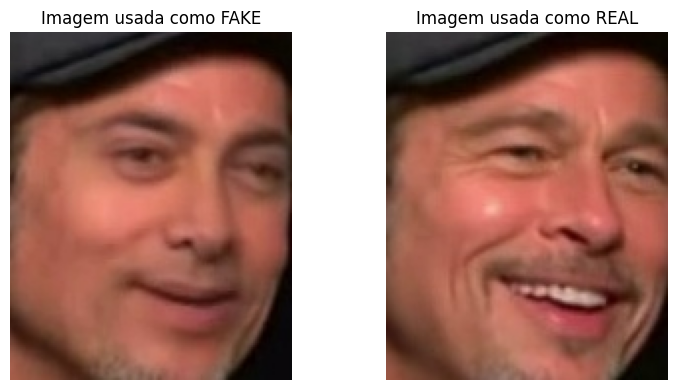

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Garantir diretório
os.chdir('/content/Capsule-Forensics')

fake_path = 'dataset/test/fake/fake_id1_id0_0000.mp4_frame_00021_face0.jpg'
real_path = 'dataset/test/real/real_id1_0000.mp4_frame_00010.jpg'

print("Imagens usadas no teste:")
print(" - Fake:", fake_path, "->", os.path.exists(fake_path))
print(" - Real:", real_path, "->", os.path.exists(real_path))

img_fake = Image.open(fake_path)
img_real = Image.open(real_path)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img_fake)
plt.title("Imagem usada como FAKE")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_real)
plt.title("Imagem usada como REAL")
plt.axis("off")

plt.tight_layout()
plt.show()
